# House Price Prediction

## Import tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [3]:
data = pd.read_csv('Housing.csv')
df = pd.DataFrame(data)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [4]:
df = df.dropna()

In [5]:
x = df.drop('MEDV', axis = 1).to_numpy()
x_train, x_test = x[:-5], x[-5:]

y = df['MEDV'].to_numpy().flatten()
y_train, y_test = y[:-5], y[-5:]

print(x_train[:5])
print(y_train[:5])

print(x_train.shape)
print(y_train.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.4300e+00
  5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9412e+02
  5.2100e+00]]
[24.  21.6 34.7 33.4 28.7]
(389, 13)
(389,)


## Normalise data

In [6]:
# Z- score normalization
def z_norm(x_train):
    mu = np.mean(x_train, axis=0)
    sigma = np.std(x_train, axis=0)
    x_train = (x_train - mu) / sigma

    return x_train, mu, sigma

## Visualise data

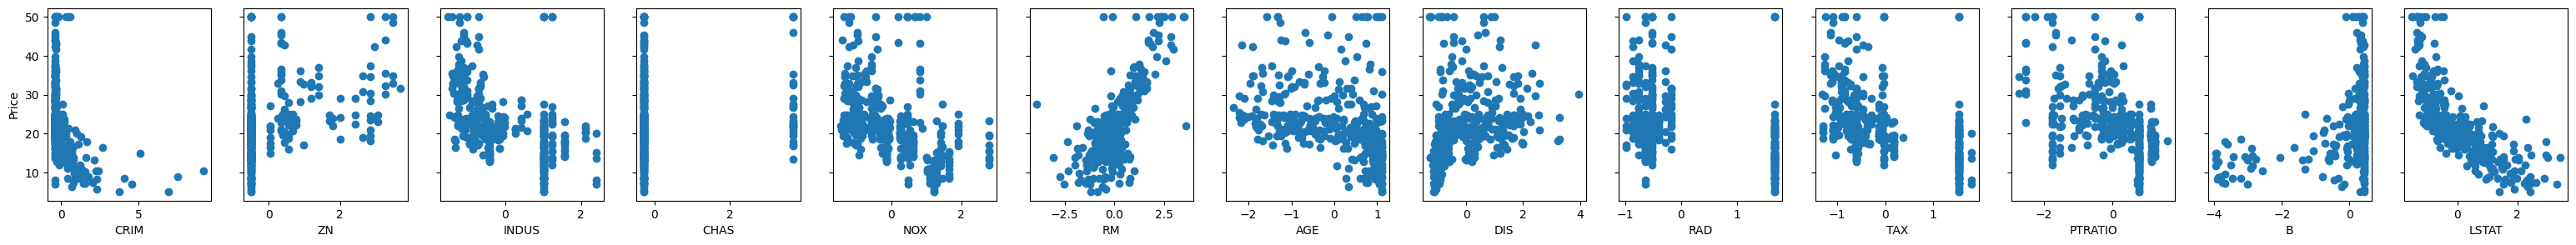

In [7]:
x_train, mu, sigma = z_norm(x_train)
cols = df.columns[:-1]
fig, ax = plt.subplots(1, len(cols), figsize = (len(cols) * 3, 3), sharey=True)
for i in range(len(cols)):
    ax[i].scatter(x_train[:, i], y_train)
    ax[i].set_xlabel(cols[i])
ax[0].set_ylabel("Price")
plt.show()

## Find parameters

In [8]:
def compute_derivative(x, y, w, b):
    
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [9]:
def final_parameters(x, y, w_in, b_in, alpha, iters):
    w = w_in[:]
    b = b_in

    for i in range(iters):
        dj_dw, dj_db = compute_derivative(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w, b 

In [10]:
w_init = np.zeros(x_train.shape[1])
w, b = final_parameters(x_train, y_train, w_init, 0.1, 0.001, 100000)

for i in range(len(w)):
    w[i] = round(w[i], 2)
b = round(b, 2)
print(w)
print(b)

[-0.89  1.21  0.19  0.69 -1.99  3.   -0.34 -3.12  2.39 -2.22 -1.9   0.87
 -3.15]
22.39


In [11]:
def predict(x, y, w, b, mu, sigma):
  for i in range(len(x)):
    curr = (x[i] - mu) / sigma
    predicted = np.dot(curr, w) + b
    print(f'Predicted: {predicted}, Actual: {y[i]}')

In [12]:
predict(x_test, y_test, w, b, mu, sigma)

Predicted: 18.399239621032372, Actual: 17.5
Predicted: 20.480990414987737, Actual: 16.8
Predicted: 22.365833768371182, Actual: 20.6
Predicted: 27.52100650892673, Actual: 23.9
Predicted: 26.032792672692825, Actual: 22.0


<function matplotlib.pyplot.show(close=None, block=None)>

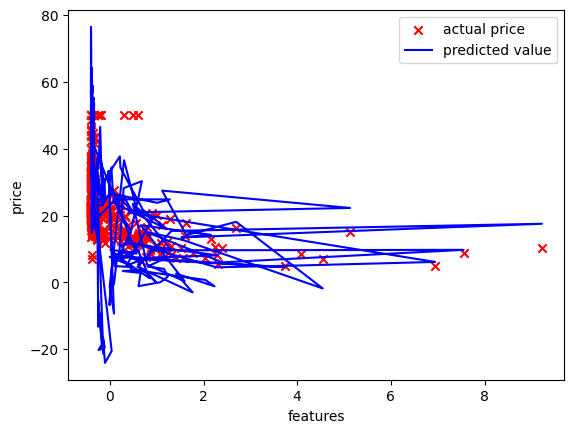

In [13]:
y_pred = []
for x in x_train:
    curr = (x - mu) / sigma
    y_pred.append(np.dot(curr, w) + b)

x_temp = x_train[:,0]

plt.scatter(x_temp, y_train, marker='x', c = 'r', label='actual price')
plt.plot(x_temp, y_pred, c = 'b', label = 'predicted value')
plt.xlabel('features')
plt.ylabel('price')
plt.legend()
plt.show